# Plot a map as Lambert Conformal

Reading states provinces from ./ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp

State province Sonora
State province Baja California
State province Chihuahua
State province Coahuila
State province Tamaulipas
State province Nuevo León
State province Quintana Roo
State province Campeche
State province Tabasco
State province Chiapas
State province Colima
State province Nayarit
State province Baja California Sur
State province Sinaloa
State province Yucatán
State province Veracruz
State province Jalisco
State province Michoacán
State province Guerrero
State province Oaxaca
State province 
State province México
State province Puebla
State province Morelos
State province Querétaro
State province Hidalgo
State province Guanajuato
State province San Luis Potosí
State province Zacatecas
State province Aguascalientes
State province Durango
State province Tlaxcala
State province Distrito Federal
Saving image to ./images/projection-conus.png



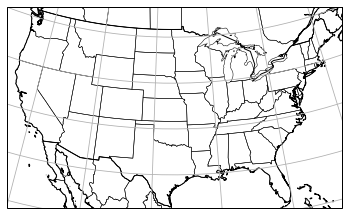

In [7]:
# projections-conus.py
# Carl Drews
# July 2020
# Added Lambert Conformal CONUS and Mexican states to Cartopy example 5 at:
# https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#lambertconformal

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.io.shapereader


#plt.figure(figsize=(4.2897, 3))
myLambert = ccrs.LambertConformal(central_longitude=-97.0,
   central_latitude=(30.0 + 60.0)/2)
ax = plt.axes(projection=myLambert)
ax.set_extent([-119.90, -73.50, 23.08, 50.00])

# set up line width
width = 1.0

ax.coastlines(resolution='50m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("50m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("50m"), linewidth=width/2)

# States of Mexico
# download from: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
shapeFilename = "./ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp"
print("Reading states provinces from {}\n".format(shapeFilename))
reader = cartopy.io.shapereader.Reader(shapeFilename)
statesProvinces = reader.records()

mexicoStates = []
for stateProvince in statesProvinces:
   if (stateProvince.attributes["admin"] == "Mexico"):
      print("State province {}".format(stateProvince.attributes["name"]))
      mexicoStates.append(stateProvince.geometry)

ax.add_geometries(mexicoStates, ccrs.PlateCarree(),
   edgecolor="black", facecolor='none', linewidth=width/2)

ax.gridlines()

savePath = "./images/projection-conus.png"

try:
    print("Saving image to {}\n".format(savePath))
    # trim whitespace but leave a narrow margin
    plt.savefig(savePath,
        bbox_inches="tight", pad_inches=0.04)

except RuntimeError as oops:
    print("{}\n".format(traceback.format_exc()))